$$\Huge{\text{Linear Algebra Basics Python}}$$

# Definitions and Notations

Matrices and Vectors.

$\mathbb R=\{x| -\infty<x< \infty\}$ the set of real numbers

$\mathbb R^n={\Huge\{}\begin{bmatrix} x_1 \\x_2 \\\vdots \\\ x_n\ \end{bmatrix} {\Huge |} x_i \in \mathbb R \huge{\}} $ __n  dimensional vectors__   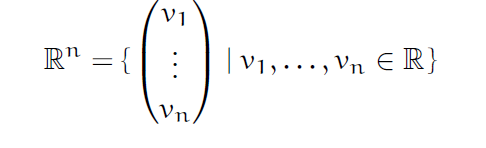

$\mathbb R^{m \times n}={\Huge\{}\begin{bmatrix} x_{1,1}\,  x_{1,2} \cdots x_{1,n}  \\x_{2,1}\,  x_{2,2} \cdots x_{2,n}  \\ \vdots \, \,\, \, \vdots \, \,\, \,\vdots \, \,\, \,\vdots\\\ x_{m,1}\,  x_{m,2} \cdots x_{m n} \ \end{bmatrix} {\Huge |} x_{i,j} \in \mathbb R \huge{\}} $   __$m\times n$ matrix__

Some Examples by Hand
 

# Python Tools

We introduce the notion of vectors and matrices. We will use two different Python Packages to manipulate these, SymPy and NumPy. One has to be careful of the different types of data structures when dealing with Python.

https://docs.sympy.org/latest/tutorial/matrices.html

https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html

## Symbolic Manipulation-Sympy

First we look at sympy.   We need to import the packages. 

In [1]:
#Importing the sympy package

import sympy as sp
from sympy import init_printing
from mpmath import *
init_printing(use_unicode=True)

$\Large{\text{Application of Matrices and vectors: Solving a system of equations}}$

We create a matrix and a vector and show that they can be used to represent a system of linear equations.  In applications the dimensions of these objects will be much, much larger but for the purpose of demonstration and visualization we will stick to smaller systems.

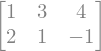

In [2]:
A=sp.Matrix([[1,3 ,4], [2,1,-1]])
A

In [3]:
b=sp.Matrix([[1],[1]])
b


We can combine these two in an augmented matrix $[ A|b] $ to represent the linear system of equations
\begin{align} x+3y+4z&=1\\2x+y-z&=1 \end{align}

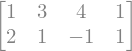

In [4]:
Ab=A.col_insert(3,b)
Ab

 To solve we apply matrix operations to get the matrix in $\text {Row Reduced Echelon Form }$

Then we rewrite the equivalent system of linear equations

\begin{align} x_1+0x_2+\frac{-7}{5}x_3&=\frac{2}{5}\\0x_1+x_2+\frac{9}{5}x_3&=\frac{1}{5} \end{align}

Solving for $x_1$, $x_2$ and $x_3$  in terms of $x_3$ yields

\begin{align} x_1&=\frac{2}{5}+\frac{7}{5}x_3 \\ x_2&=\frac{1}{5}-\frac{9}{5}x_3 \\x_3&=0+x_3 \end{align} 

Now choosing any value for $x_3$ gives a solution of the system.

The second piece of the answer returned from rref i.e. (0,1), is the pivot columns of the original matrix.


There is another sympy function that works as well. **linsolve**  This is the preferred method for us.

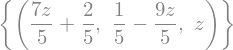

In [5]:
from sympy import S, linsolve, symbols
x, y, z = symbols("x, y, z")
linsolve((A, b), [x, y, z])

Putting all the code together in one cell we would have  

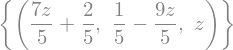

In [6]:
import sympy as sp
from sympy import init_printing
from mpmath import *
init_printing(use_unicode=True)
from sympy import S, linsolve, symbols
x, y, z = symbols("x, y, z")

A=sp.Matrix([[1,3 ,4], [2,1,-1]])
b=sp.Matrix([[1],[1]])
linsolve((A, b), [x, y, z])

Since there is a variable left over this means we have infinitely many solutions to this system of equations.  Try to solve the following to systems using linsolve.

\begin{align} x+3y+4z&=1\\2x+6y+8z&=-1 \end{align}

and

\begin{align} x+3y+4z&=1\\2x+y-z&=1 \\ 3x+4y+5z&=-1\end{align}


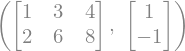

In [7]:
#
A=sp.Matrix([[1,3 ,4], [2,6,8]])
b=sp.Matrix([[1],[-1]])
Ab=A.col_insert(3,b)
A,b

In [8]:
#
x, y, z = symbols("x, y, z")
linsolve((A, b), [x, y, z])

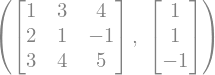

In [9]:
#
A=sp.Matrix([[1,3 ,4], [2,1,-1],[3,4,5]])
b=sp.Matrix([[1],[1],[-1]])
Ab=A.col_insert(3,b)
A,b

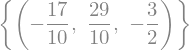

In [10]:
#
x, y, z = symbols("x, y, z")
linsolve((A, b), [x, y, z])

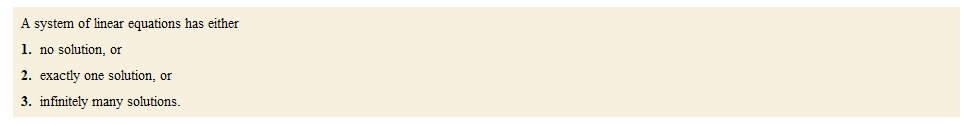

From http://www.math-exercises.com/

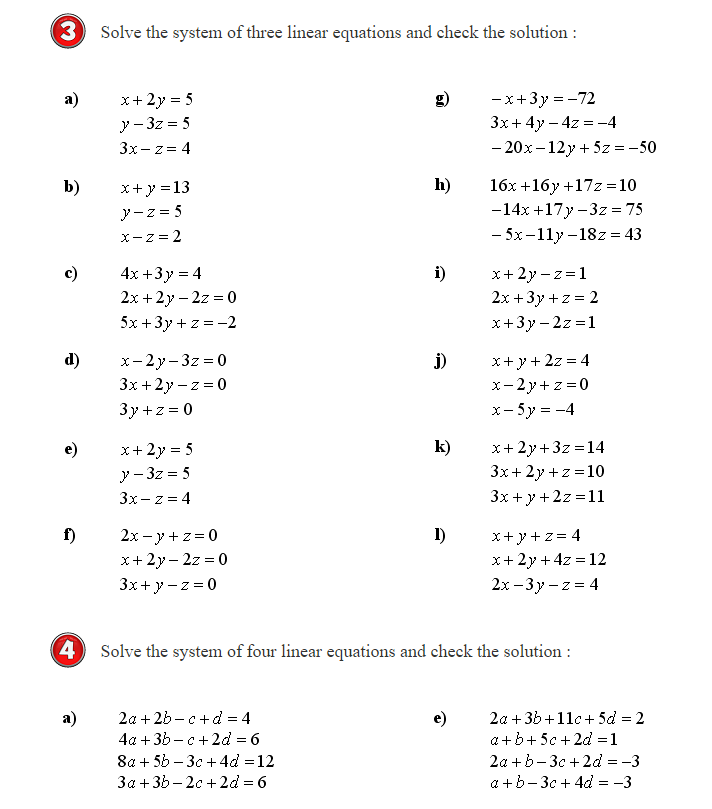

### Matrix Addition, Multiplication, and Powers

Discuss dimension issues.

* To add or subtract matrices they must be the same dimensions
* To multiply two matrices $AB$, the number of rows of $B$ must be the same as the number of columns of $A$
* To rasie a matrix to a power $A^n$, $A$ must have the same number of rows as columns ( we call this type of matrix a square matrix) 
* For scalar multiplication $ \alpha A$ there are no restrictions on the dimensions

For the matrices below which can you add, multiply, raise to a power or multiply by -2.  


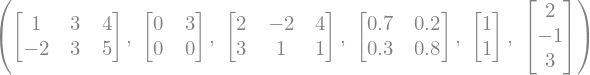

In [11]:
A = sp.Matrix([[1, 3 ,4], [-2, 3, 5]])
B = sp.Matrix([[0, 3], [0, 0]])
C= sp.Matrix([[2,-2,4],[3,1,1]])
D=sp.Matrix([[.7,.2],[.3,.8]])
x=sp.Matrix([[1],[1]])
y=sp.Matrix([[2],[-1],[3]])
A,B,C,D,x,y


In [12]:
#
A+B

ShapeError: Matrix size mismatch: (2, 3) + (2, 2)

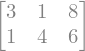

In [13]:
#
A+C

In [14]:
#
A*C

ShapeError: Matrix size mismatch: (2, 3) * (2, 3).

In [15]:
#
A*D

ShapeError: Matrix size mismatch: (2, 3) * (2, 2).

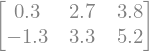

In [16]:
D*A

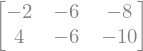

In [17]:
-2*A


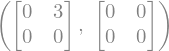

In [18]:
B, B*B

Notice B is not all 0s but $B^2$ is

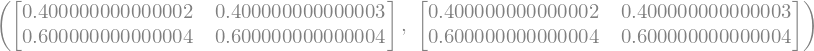

In [19]:
D**150, D**151

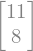

In [20]:
A*y

__What can we say bout the dimensions of the outputs of the various operations?__

$m \times n$ Matrices can be viewed as a map from $\mathbb R^n$ to $\mathbb R^m$ 


$\Large{\text{Application of Matrices and Vectors: Transition Matrix}}$

Suppose we have a community consisting just of the suburbs and the city. We wish to approximate the movement between them every year.  We estimate that 70% of the people in the city stay in the city and 30% move to the suburb every year. For the suburb 80% stay in the suburb and 20% move to the city.  If we start with a million in each can we determine wind up in each over one year? 10 years?50 years? Notice anything.  Lets start by wiring some equations that represent this.    



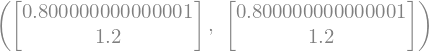

In [21]:
#
D**50*x,D**51*x

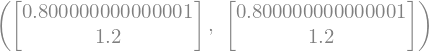

In [22]:
#
D**50*x, D**51*x

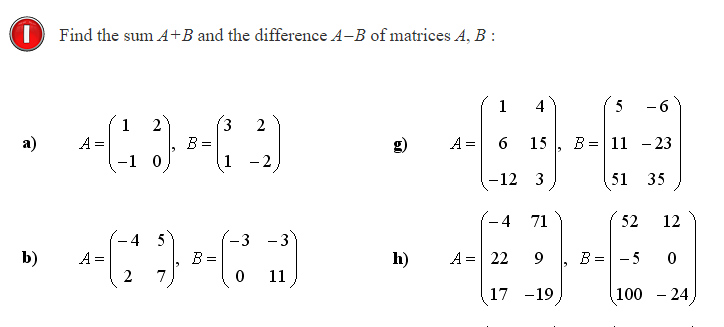

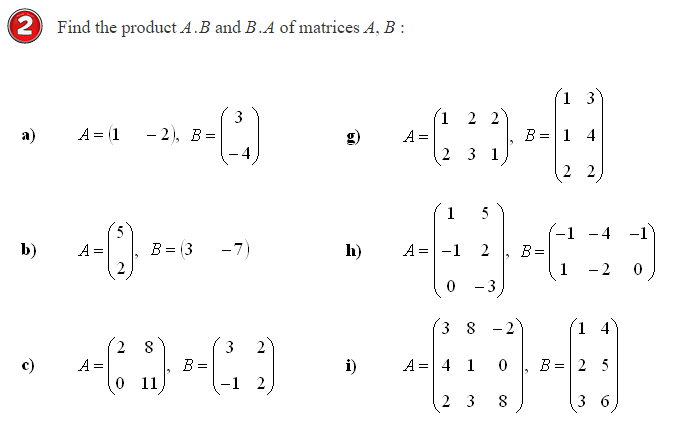

From 1.b find $A^5$ and from 2.c find $A^5$. Do you think these matrices stabilize like the matrix D did above?  That is, for large enough $n$ is $A^n=A^{n+1}$?   

$\Large{\text{Eigenvalues and Eigenvectors with Sympy}}$

Let start with a definition



__DEFINITION__

An eigenvector of an $n\times n$ matrix $A$ is a nonzero vector x such that $A x=\lambda x$ for some scalar $\lambda$. A scalar $\lambda$ is called an eigenvalue of A if there is a vector $x \ne 0$ so that  $A x=\lambda x$; such an $x$ is called an eigenvector corresponding to $\lambda$.

Wikipage on eigenvectors https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

Lets do a couple by hand to get the feel of it 

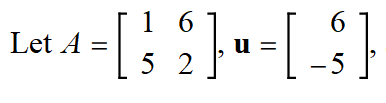

We can check using sympy

In [23]:
import sympy as sp
from sympy import init_printing
from mpmath import *
init_printing(use_unicode=True)

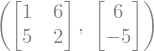

In [24]:
M=sp.Matrix([[1,6], [5,2]])
u=sp.Matrix([[6],[-5]])
M,u

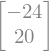

In [25]:
M*u

We will usually only be given a matrix and we will have to find eigenvectors and eigenvalues.  Sympy can do this for us too  

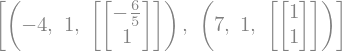

In [26]:
M.eigenvects()

What does all the out put mean?  Why is it different?

<font color =blue>__Important Fact: Any scalar multiple of an eigenvector is also an eigenvector with the same eigenvalue__  </font>

__Exercise__

Use Sympy to find the eigenvectors for the matrix below.

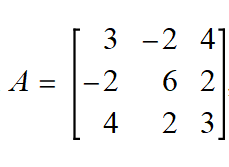

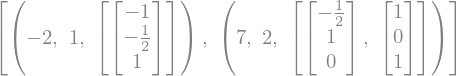

In [27]:
M=sp.Matrix([[3,-2,4],[-2,6,2], [4,2,3]])
M.eigenvects()

__Discuss output__

Above is the out put that I got.

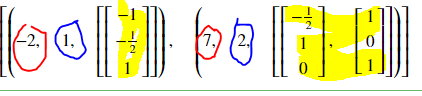

<font color=red>Red- eigenvalues</font>

<font color=blue>Blue- # of eigenvectors for that eigenvalue 

<font color=yellow>yellow- eigenvectors</font>


__Excersice__

Last one with Sympy  
 
 $M=\begin{bmatrix}1&3&4\\2&1&-1\\-1&1&1\end{bmatrix},$

<font color=red> __Yikes__</font> 

## Numpy

Let's tray that last one again with Numpy https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.eig.html

In [30]:
from numpy import linalg as LA
import numpy as np

In [31]:
M1=np.matrix([[1,3 ,4], [2,1,-1],[-1,1,1]])
print(M1)
w,v=LA.eig(M1)

[[ 1  3  4]
 [ 2  1 -1]
 [-1  1  1]]


With this LA.eig command w holds the eigenvalues and v returns the eigenvectors  

In [32]:
print(w)

[ 3.37364982+0.j         -0.18682491+1.79601228j -0.18682491-1.79601228j]


In [33]:
print(v)

[[ 0.75513779+0.j          0.6330708 +0.j          0.6330708 -0.j        ]
 [ 0.65418503+0.j         -0.47680111-0.29537514j -0.47680111+0.29537514j]
 [-0.0425306 +0.j          0.16976479+0.50578208j  0.16976479-0.50578208j]]


Try it on the first matrix we used to today 
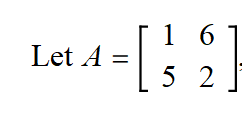

In [39]:
#
M1=np.matrix([[1, 6], [5,2]])
print(M1)
w,v=LA.eig(M1)
print(w) 
print(v)

[[1 6]
 [5 2]]
[-4.  7.]
[[-0.76822128 -0.70710678]
 [ 0.6401844  -0.70710678]]


Numpy and sympy store matrices different so commands from each are not interchangeable.  For example if we use the sympy method to get eigenvectors we will get an error. 

In [40]:
M1.eigenvects()

AttributeError: 'matrix' object has no attribute 'eigenvects'

Here is the output I got.  __Why are they
different?__  Let's check it using some python commands to extract the eigenvectors from the output instead of retyping the output. (<font color =red> I actually forgot how this indexing worked so I googled it.Stack overflow is a great resource </font>)  https://stackoverflow.com/questions/4455076/how-to-access-the-ith-column-of-a-numpy-multidimensional-array/4455154

In [36]:
x=v[:,1]
x

matrix([[-0.70710678],
        [-0.70710678]])

Let's multiply x by the matrix M1 

In [37]:
M1*x

matrix([[-4.94974747],
        [-4.94974747]])

Now we can compare it to 7*x

In [38]:
7*x

matrix([[-4.94974747],
        [-4.94974747]])

__Excercise__
Do the same thing for the other vector.  Hint the first column in Python is indexed with a 0. What is the eigenvalue this time?

In [ ]:
#
x=v[:,0]
x

Let's multiply x by the matrix M1 

In [ ]:
#
M1*x

Now we can compare it to -4*x

In [ ]:
#
-4*x

## Exercises for EigenValues 

Find all eigenvalues and "unique" eigenvectors for the matrices below using python and numpy.  

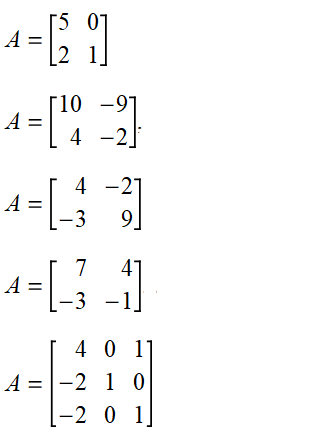

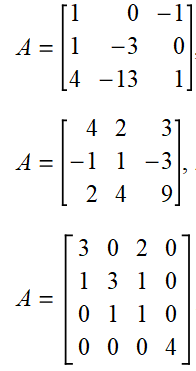

## Careful mixing these two

Matrices are stored differently for Numpy and Sympy. 

the same multiplication, addition and, power rules apply for numpy matrices A+B, A*x,A**2

In [ ]:
M1*M1

In [ ]:
M1+M1
